In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import math

In [9]:
# OpenCV는 이미지를 BGR로 읽는데
# plt 라이브러리는 RGB로 이미지를 읽음!!!

I = cv2.imread('balloons_smaller.jpg')

cv2.imshow('image', I)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# 이미지를 확대하세요.
def my_resizing(img):
    matrix = np.array([[ 1.5 ,0,0  ],[ 0  , 1.5 , 0  ]], dtype=np.float32)                   # 1.5배 확대하는 matrix 만들기
    result = cv2.warpAffine(img, matrix, None)
    return result

resized = my_resizing(I)

In [5]:
# 이미지를 가로: 30px, 세로: 20px 이동하세요
def my_translation(img):
    matrix = np.array([[  1, 0  ,30  ],[ 0  ,1  , 20  ]], dtype=np.float32)                # 가로와 세로를 이동하는 matrix 만들기
    result = cv2.warpAffine(img, matrix, None)
    return result

translation = my_translation(resized)

In [17]:
# 이미지를 30도 회전하세요 (회전축은 이미지의 중심) - 실습과제 PPT를 참고하세요
def my_rotation(img, angle):
    center_x = img.shape[1]/2
    center_y = img.shape[0]/2
    
    rad = math.radians(angle)
    
    a = math.cos(rad)
    b = math.sin(rad)
    
    matrix = np.array([[  a , b   , (1-a)*center_x-b*center_y   ],
                       [ -b  , a   , b*center_x+(1-a)*center_y  ]], dtype=np.float32)

    result = cv2.warpAffine(img, matrix, None)
    return result

rotation = my_rotation(translation, 30)

In [11]:
# 이미지를 shearing 하세요
def my_shear(img):
    
    matrix_x = np.array([[ 1 , 0  , 0  ],[  0.2 , 1  ,0   ]], dtype=np.float32)                     # 가로: 0.2의 비율로 shearging
    matrix_y = np.array([[ 1 , 0.2  , 0  ],[ 0  , 1  , 0  ]], dtype=np.float32)                     # 세로: 0.2의 비율로 shearging
    
    result_1 = cv2.warpAffine(img, matrix_x, None)
    result_2 = cv2.warpAffine(result_1, matrix_y, None)
    return result_2

shearing = my_shear(rotation)

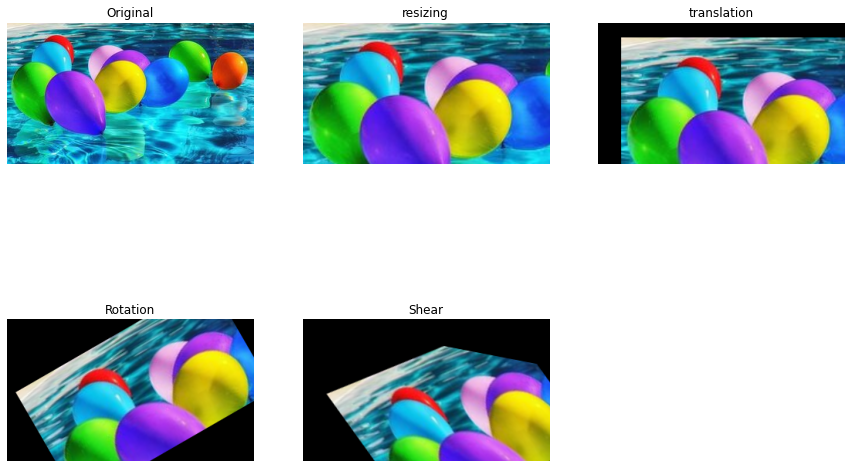

In [22]:

RGBimg = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (15, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
  
ax5 = fig.add_subplot(rows, cols, 1)
ax5.imshow(RGBimg)
ax5.set_title('Original')
ax5.axis("off")

ax1 = fig.add_subplot(rows, cols, 2)
resizing = my_resizing(RGBimg)
ax1.imshow(resizing)
ax1.set_title('resizing')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 3)
translation = my_translation(resizing)
ax2.imshow(translation)
ax2.set_title('translation')
ax2.axis("off")
 
ax3 = fig.add_subplot(rows, cols, 4)
rotation = my_rotation(translation, 30)
ax3.imshow(rotation)
ax3.set_title('Rotation')
ax3.axis("off")
 
ax4 = fig.add_subplot(rows, cols, 5)
shear = my_shear(rotation)
ax4.imshow(shear)
ax4.set_title('Shear')
ax4.axis("off")


 


plt.show()
